In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import numpy as np

df = pd.read_csv('wine.data', sep=',')
df.describe()


,Classify,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline of diluted wines
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\okchr\AppData\Local\Temp/ipykernel_13880/1048091120.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


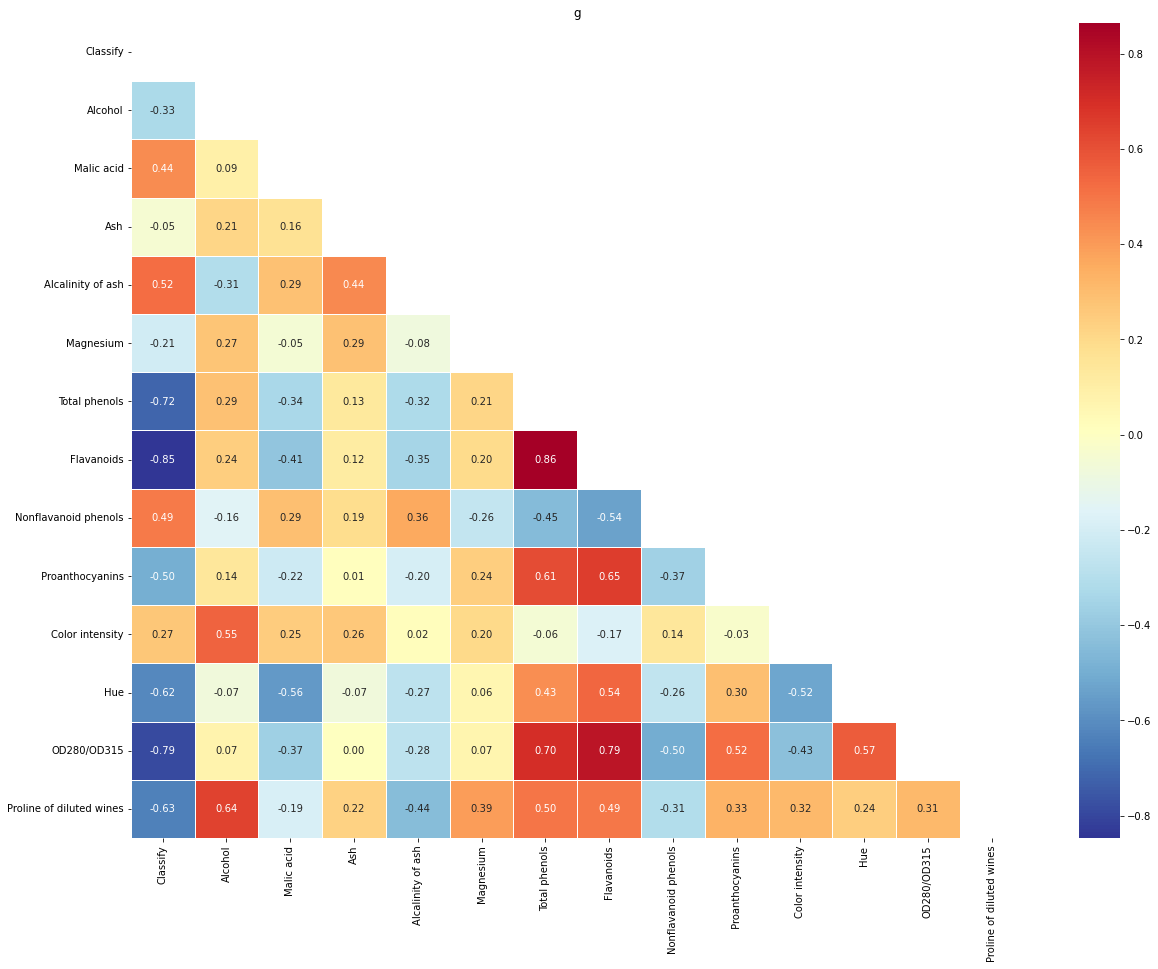

In [2]:
corr = df.corr()
plt.figure(figsize= (20,15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr, annot = True, mask=mask,fmt='.2f', linewidths=1.,cmap='RdYlBu_r')
plt.title('g')
plt.show()

In [3]:
df = df.replace({'Classify': {1:0,2:1,3:2}})
df_rabel = df['Classify'] # 미리 저장해두자 

df = df.drop('Classify', axis= 1)
df = df.drop('Flavanoids' , axis= 1)
df = df.drop('OD280/OD315' , axis= 1)
df = df.drop('Alcohol' , axis= 1)




In [4]:
df.isnull().sum()

Malic acid                  0
Ash                         0
Alcalinity of ash           0
Magnesium                   0
Total phenols               0
Nonflavanoid phenols        0
 Proanthocyanins            0
Color intensity             0
Hue                         0
Proline of diluted wines    0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df)


In [7]:
from sklearn.cluster import KMeans

In [35]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 15,  n_init=100)

# 정규화된 데이터에 학습
model.fit(df_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(df_scale)

df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)



pandas.core.series.Series

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(df)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,318.559311,21.495286
1,303.096253,-5.362293
2,438.059827,-6.535772
3,733.237079,0.193661
4,-11.573119,18.491004
...,...,...
173,-6.978569,-4.545235
174,3.133697,2.330895
175,88.460720,18.772166
176,93.459041,18.667059


In [10]:
merged = pd.concat([result, df_cluster], axis =1)

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


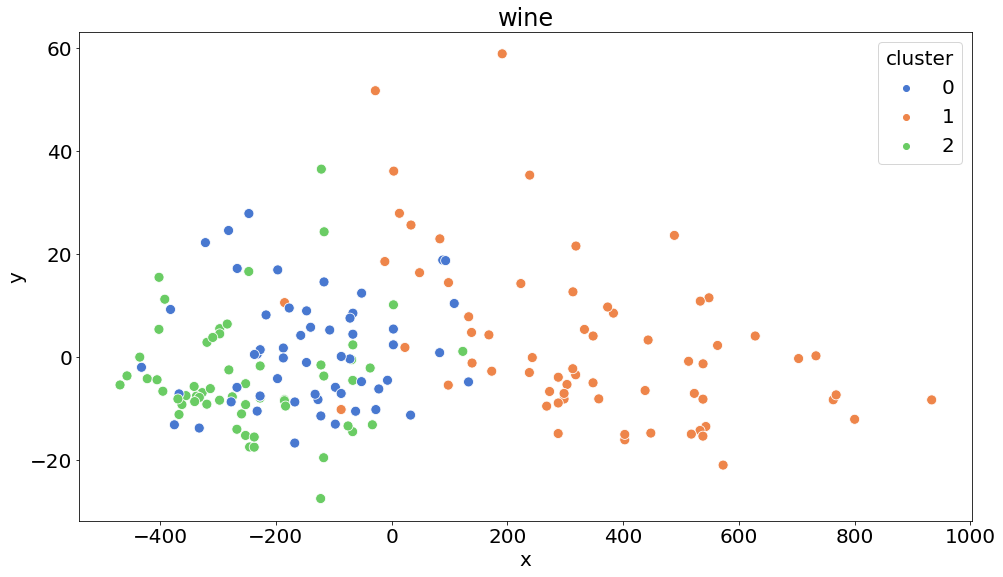

In [11]:


%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('wine')
plt.show()

In [12]:
merged_real = pd.concat([result, df_rabel], axis =1)

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


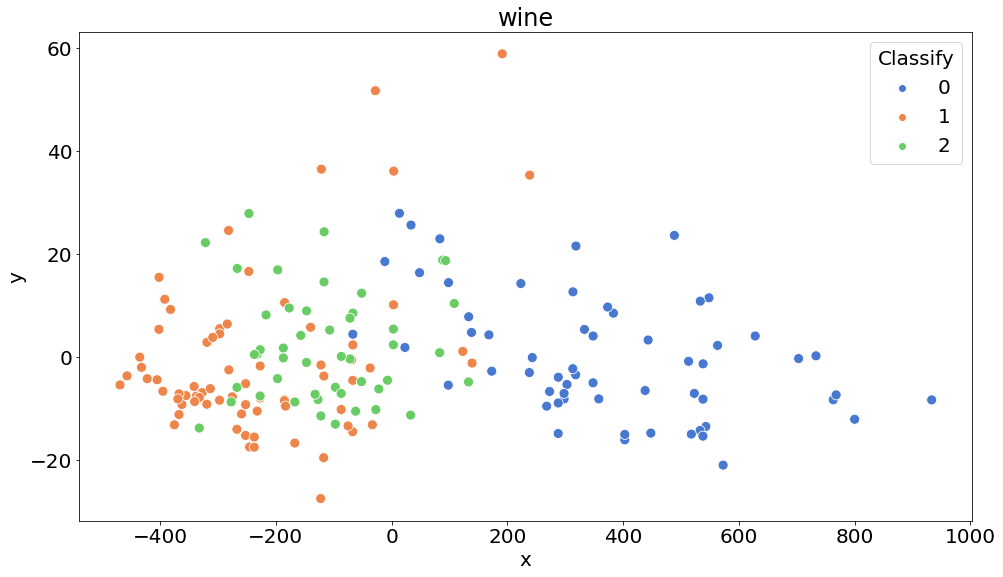

In [13]:
%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged_real['x'], 
                     merged_real['y'], 
                     hue=merged_real['Classify'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('wine')
plt.show()

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
result.describe()

,x,y
count,1.780000e+02,1.780000e+02
mean,-3.816173e-14,3.118604e-18
std,3.149623e+02,1.313518e+01
min,-4.690597e+02,-2.750094e+01
25%,-2.461407e+02,-8.329277e+00
50%,-7.352432e+01,-3.267993e+00
75%,2.385636e+02,5.446053e+00
max,9.331160e+02,5.879488e+01


In [15]:
score_samples = silhouette_samples(merged, df_cluster)
print(score_samples.shape)
print(score_samples)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print(average_score)

(178,)
[ 0.58538564  0.57464179  0.63634084  0.53148908 -0.57473101  0.54536371
  0.62435903  0.62108578  0.56805582  0.5682954   0.51753606  0.62779241
  0.60874115  0.63047259  0.49917856  0.61527406  0.62673525  0.62646288
  0.43947596 -0.13554742 -0.41993334 -0.46665261  0.55447276  0.51856621
 -0.13871688 -0.20928723  0.63560271  0.62599092  0.2298675   0.55369627
  0.62692302  0.51514155  0.46690131  0.6313602   0.61231011  0.24879441
  0.06340343  0.61672938  0.52870062 -0.49014651 -0.3653228   0.55147562
  0.61205077  0.36697772  0.08995613  0.60247682  0.59030938  0.4544738
  0.58571     0.63267891  0.63070834  0.6309306   0.63649574  0.58146658
  0.58384233  0.62300849  0.41564834  0.63102093  0.62686574  0.09774819
 -0.38822584  0.36056306 -0.34514872  0.40031875  0.37766865 -0.38716284
  0.20436066  0.16395686 -0.36921916 -0.59350392 -0.31115788  0.40382001
  0.31358141  0.44687316  0.09358279  0.39126548  0.40105697  0.18181665
 -0.51729954  0.32981508  0.31353362 -0.37952

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}})
df_rabel = df['Classify'] # 미리 저장해두자 

df = df.drop('Classify', axis= 1)
linked = linkage(df, 'single')

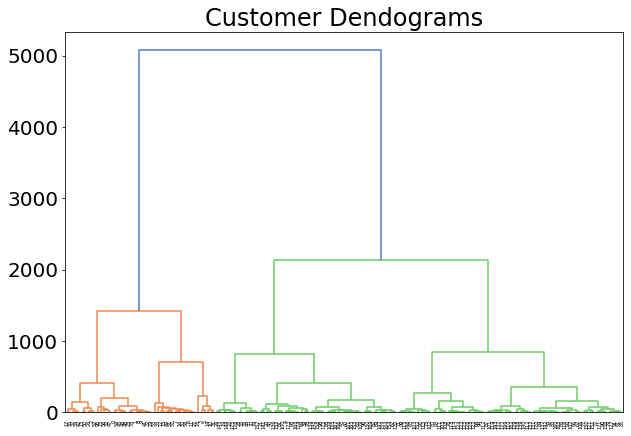

In [38]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [39]:
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)
result = pca.fit_transform(df)

result = pd.DataFrame(result, columns=["x", "y"])


cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['cluster'] = pd.DataFrame( cluster.fit_predict(df))
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)




pandas.core.series.Series

In [40]:
merged = pd.concat([result, df_cluster], axis =1)

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


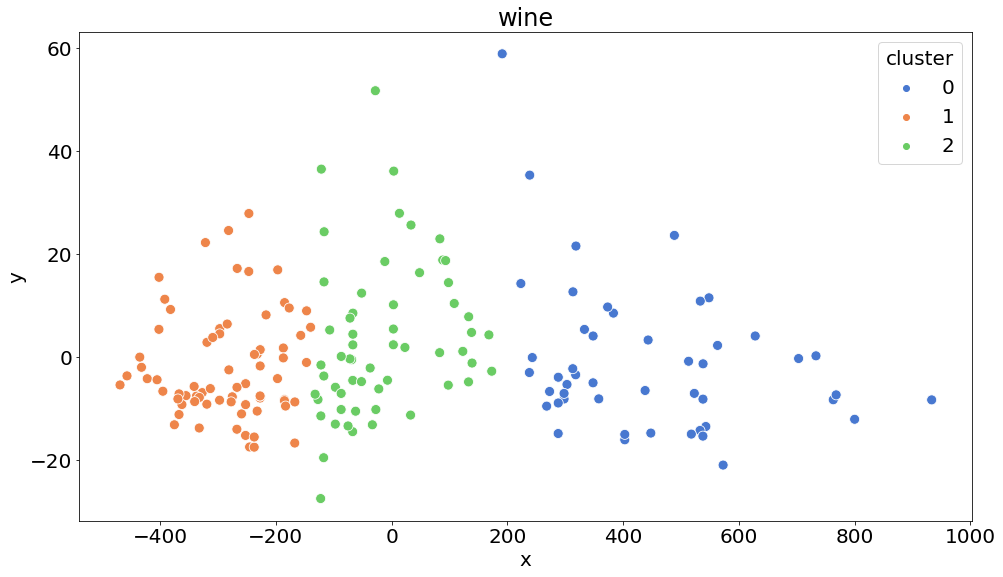

In [41]:

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('wine')
plt.show()

In [51]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}})
df_rabel = df['Classify'] # 미리 저장해두자 

df = df.drop('Classify', axis= 1)

In [52]:
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [114]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.4005,min_samples=7)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r)

      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     Total phenols  Flavanoids  Nonflavanoid phenols   Proanthocyanins  \
0         0.627586    0.573840              0.283019          0.593060   
1         0.575862    0

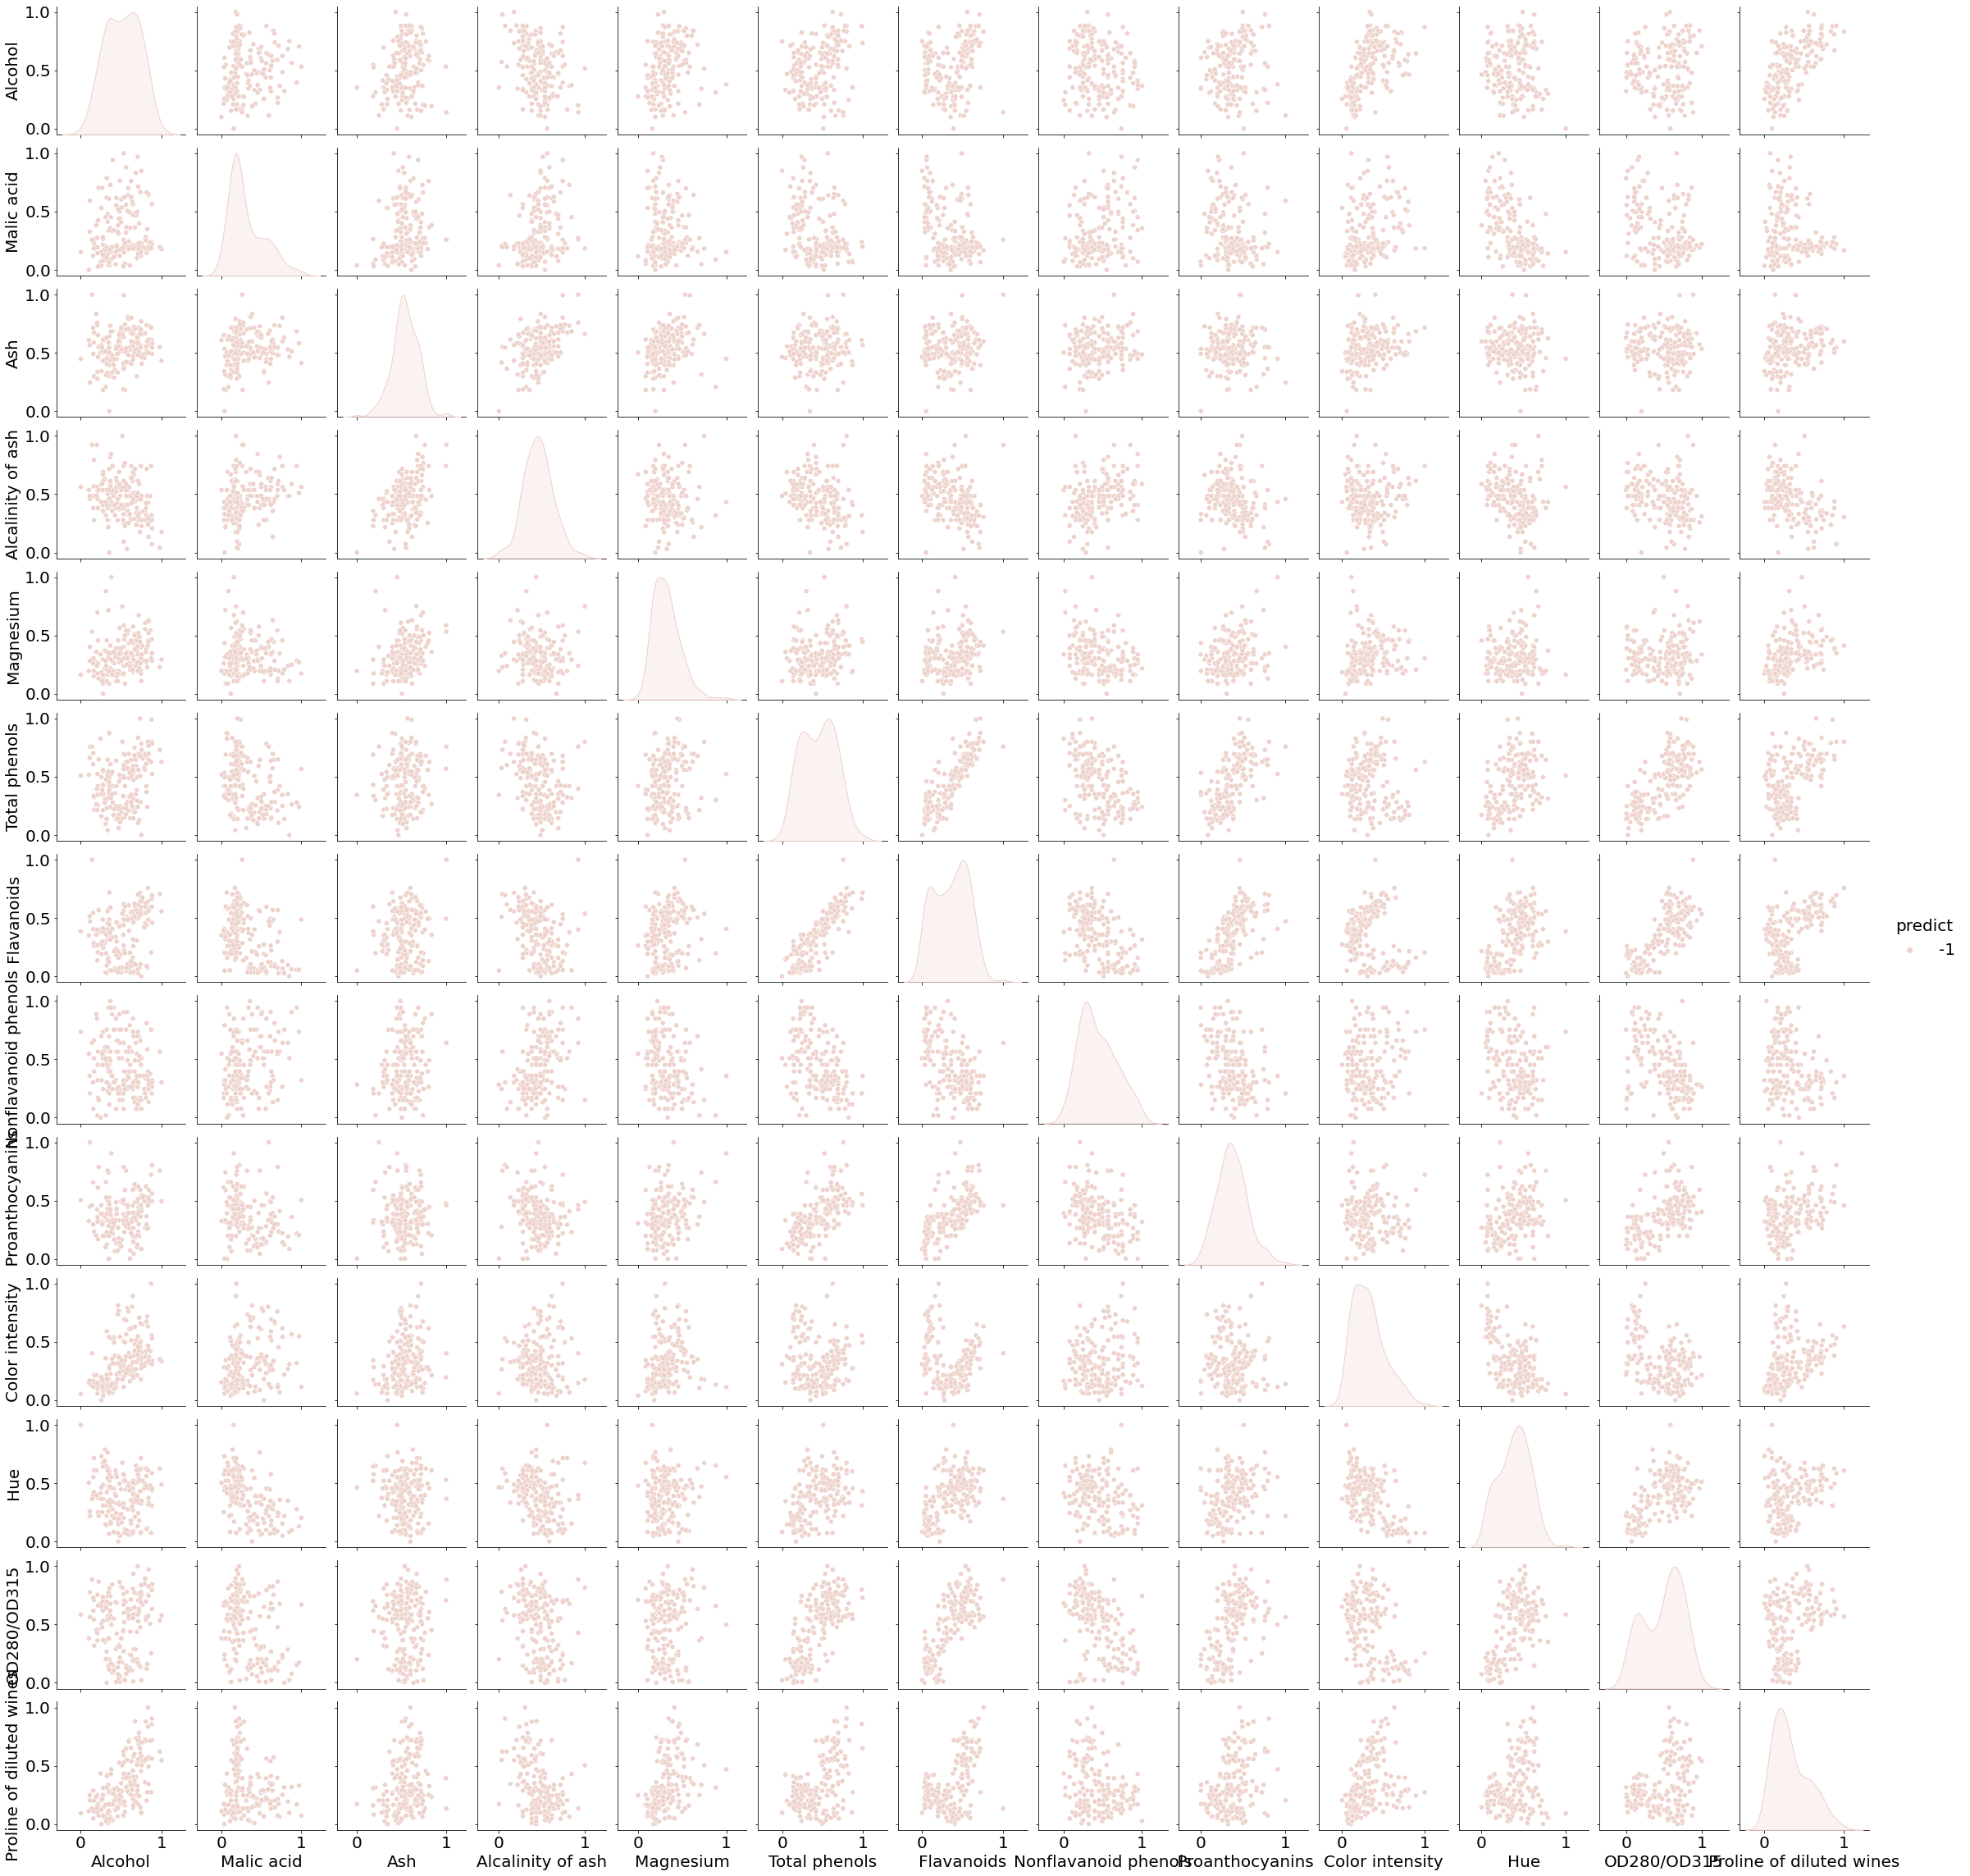

In [61]:
# #pairplot with Seaborn
# sns.pairplot(r,hue='predict')
# plt.show()

In [115]:
pca = PCA(n_components=2)
result = pca.fit_transform(df)

result = pd.DataFrame(result, columns=["x", "y"])

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)



pandas.core.series.Series

C:\Users\okchr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


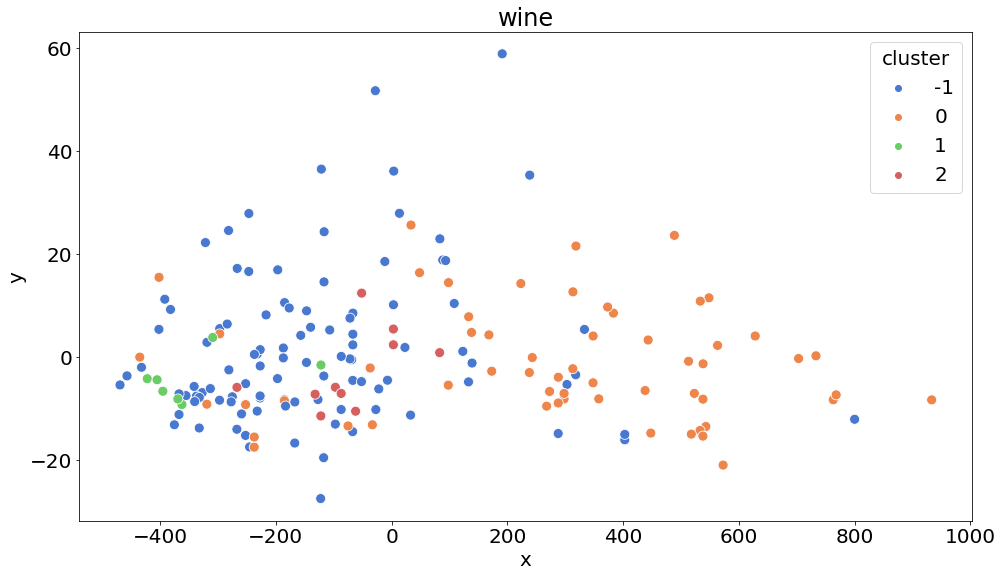

In [117]:
merged = pd.concat([result, df_cluster], axis =1)
%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=4),
                    )
plt.title('wine')
plt.show()